Step 1: Import Required library

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

Step 2: Read FITS file

In [11]:
spectra_file = fits.open('spec-1678-53433-0153.fits') # read fits file
# file information
spectra_file.info()

Filename: spec-1678-53433-0153.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     141   ()      
  1  COADD         1 BinTableHDU     26   3844R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


Step 3: Extract Spectral Data
1. Flux
2. Wavelength
3. Flux Error

In [12]:
COADD = spectra_file[1].data
COADD

FITS_rec([(10.2818985, 3.5793, 0.0746585 , 0, 201326592, 1.2967426 , 11.278419 ,  6.167854 ),
          ( 8.347022 , 3.5794, 0.        , 0, 201326592, 1.2965463 , 11.223416 ,  6.0684347),
          ( 6.412397 , 3.5795, 0.08605041, 0, 201326592, 1.2963499 , 11.198327 ,  6.0330253),
          ...,
          (23.653196 , 3.9634, 0.71864367, 0, 0, 0.6867233 ,  4.5101957, 25.112555 ),
          (24.982101 , 3.9635, 0.6674298 , 0, 0, 0.68696654,  4.590603 , 25.158003 ),
          (25.65489  , 3.9636, 0.6277282 , 0, 0, 0.6872105 ,  4.710641 , 24.708454 )],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

In [13]:
flux = COADD['flux']          # Flux
lam = 10**COADD['loglam']     # Wavelength
Ivar = COADD['ivar']          # used to find error in flux
flux_err = 1/np.sqrt(Ivar)    # Flux Error
flux_err

/tmp/ipykernel_1443/2606172991.py:4: RuntimeWarning: divide by zero encountered in divide
  flux_err = 1/np.sqrt(Ivar)    # Flux Error


array([3.6598253,       inf, 3.4089725, ..., 1.1796229, 1.2240444,
       1.2621593], shape=(3844,), dtype=float32)

Step 4: Calculate- $$SNR = \frac{Flux}{Flux_{err}}$$

In [14]:
SNR = flux/flux_err
SNR

array([ 2.809396 ,  0.       ,  1.8810351, ..., 20.051489 , 20.409473 ,
       20.326189 ], shape=(3844,), dtype=float32)

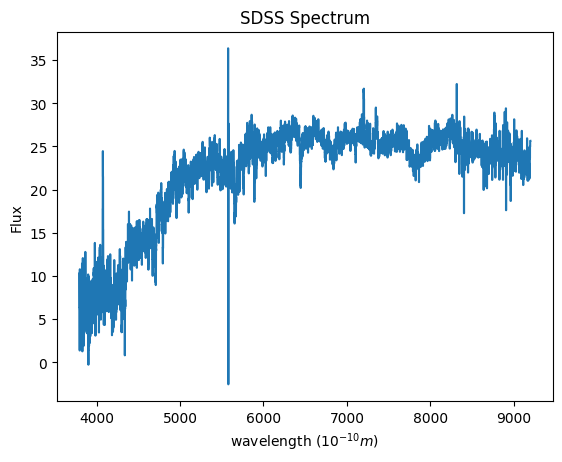

In [15]:
plt.figure()
plt.step(lam, flux)
plt.xlabel('wavelength ($10^{-10}m$)')
plt.ylabel('Flux')
plt.title('SDSS Spectrum')
plt.show()

Step 5: X - wavelength, L - Flux

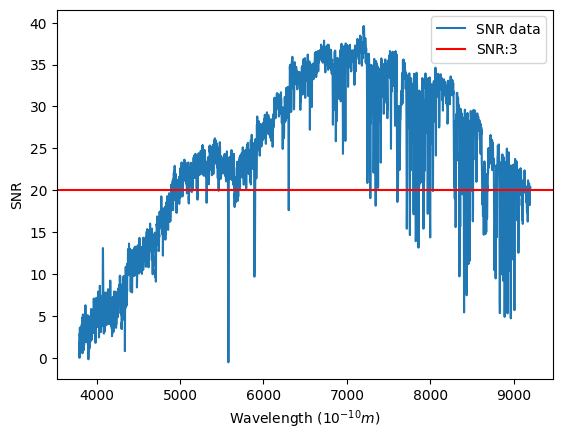

In [16]:
plt.figure()
plt.plot(lam, SNR, label = 'SNR data')
plt.xlabel('Wavelength ($10^{-10}m$)')
plt.ylabel('SNR')
plt.axhline(y=20, c='red', label = 'SNR:3')
plt.legend()
plt.show()